In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [8]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


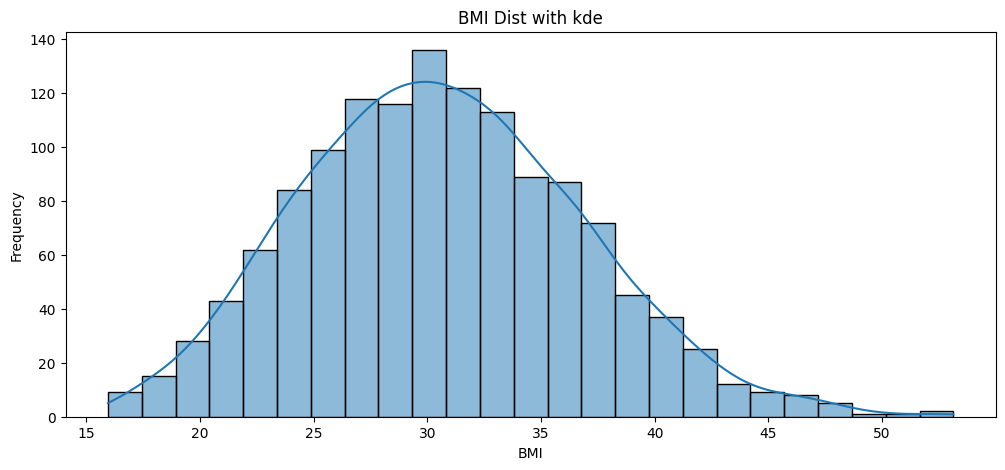

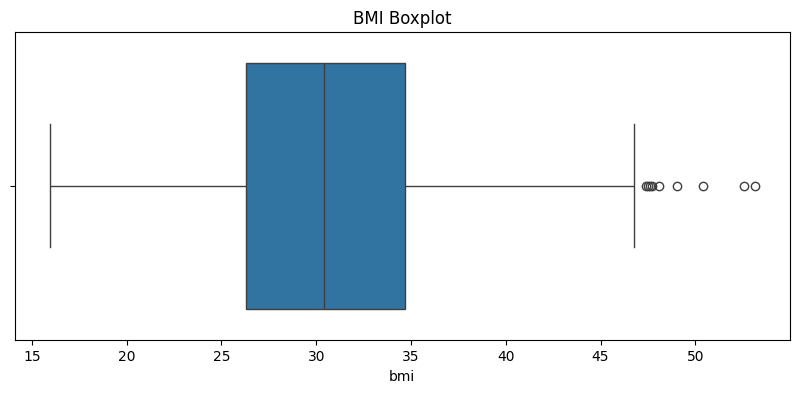

In [13]:
plt.figure(figsize=(12,5))

sns.histplot(df['bmi'],kde=True)
plt.title('BMI Dist with kde')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x = df['bmi'])
plt.title('BMI Boxplot')
plt.show()

In [14]:
# remove the outlier

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'lower: {lower_bound}')
print(f'upper: {upper_bound}')

lower: 13.7
upper: 47.290000000000006


In [15]:
df.drop_duplicates(inplace=True)

In [18]:
# cliping the outliers

df_cleaned = df[(df['bmi'] >= lower_bound) &  (df['bmi'] <= upper_bound)]

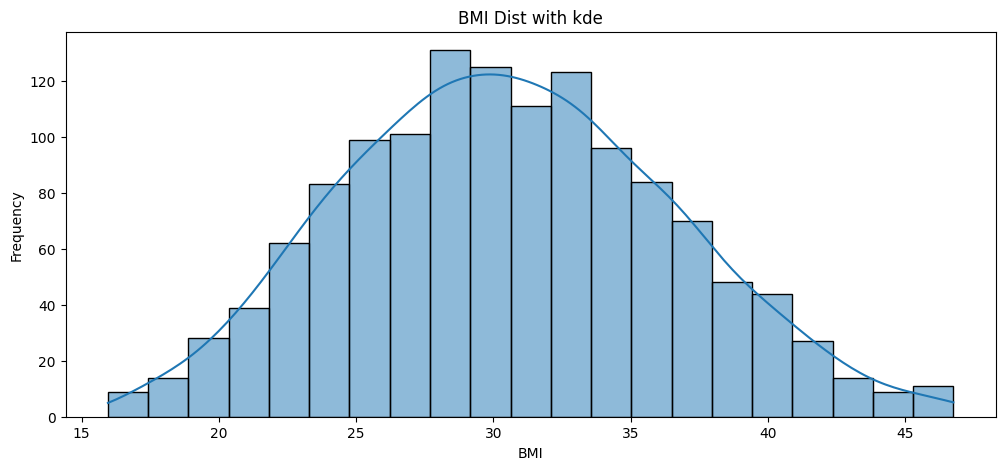

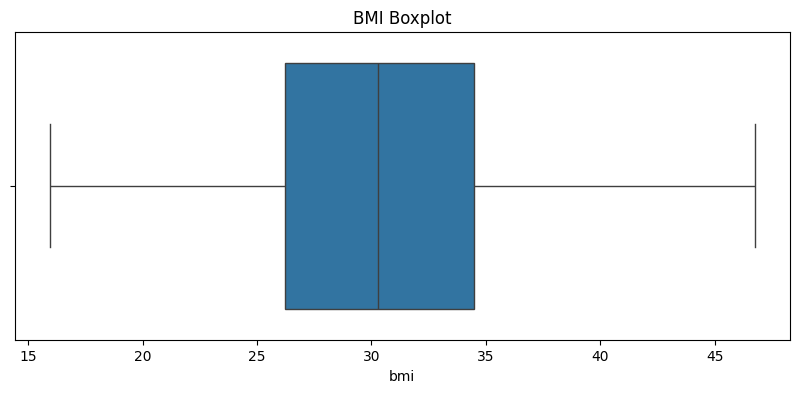

In [19]:
plt.figure(figsize=(12,5))

sns.histplot(df_cleaned['bmi'],kde=True)
plt.title('BMI Dist with kde')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x = df_cleaned['bmi'])
plt.title('BMI Boxplot')
plt.show()

In [20]:

df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [21]:
#  one hot encoding

df_cleaned = pd.get_dummies(df_cleaned, columns=['smoker', 'region'])

In [22]:
df_cleaned

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,False,True,False,False,False,True
1,18,1,33.770,1,1725.55230,True,False,False,False,True,False
2,28,1,33.000,3,4449.46200,True,False,False,False,True,False
3,33,1,22.705,0,21984.47061,True,False,False,True,False,False
4,32,1,28.880,0,3866.85520,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,True,False,False,True,False,False
1334,18,0,31.920,0,2205.98080,True,False,True,False,False,False
1335,18,0,36.850,0,1629.83350,True,False,False,False,True,False
1336,21,0,25.800,0,2007.94500,True,False,False,False,False,True


In [23]:
df_cleaned.corr()

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.018089,0.114785,0.042103,0.301317,0.025075,-0.025075,0.001153,0.001624,-0.012249,0.009868
sex,-0.018089,1.000000,0.039966,0.019973,0.064161,-0.080269,0.080269,0.000997,-0.011291,0.010721,-0.000771
bmi,0.114785,0.039966,1.000000,0.017366,0.193270,0.002868,-0.002868,-0.136205,-0.128760,0.255903,0.000655
children,0.042103,0.019973,0.017366,1.000000,0.069125,-0.007234,0.007234,-0.025255,0.025449,-0.019239,0.019641
charges,0.301317,0.064161,0.193270,0.069125,1.000000,-0.785896,0.785896,0.009342,-0.036482,0.071191,-0.046341
smoker_no,0.025075,-0.080269,0.002868,-0.007234,-0.785896,1.000000,-1.000000,-0.004732,0.035315,-0.068055,0.039665
smoker_yes,-0.025075,0.080269,-0.002868,0.007234,0.785896,-1.000000,1.000000,0.004732,-0.035315,0.068055,-0.039665
region_northeast,0.001153,0.000997,-0.136205,-0.025255,0.009342,-0.004732,0.004732,1.000000,-0.322050,-0.343750,-0.322050
region_northwest,0.001624,-0.011291,-0.128760,0.025449,-0.036482,0.035315,-0.035315,-0.322050,1.000000,-0.344453,-0.322709
region_southeast,-0.012249,0.010721,0.255903,-0.019239,0.071191,-0.068055,0.068055,-0.343750,-0.344453,1.000000,-0.344453


<Axes: >

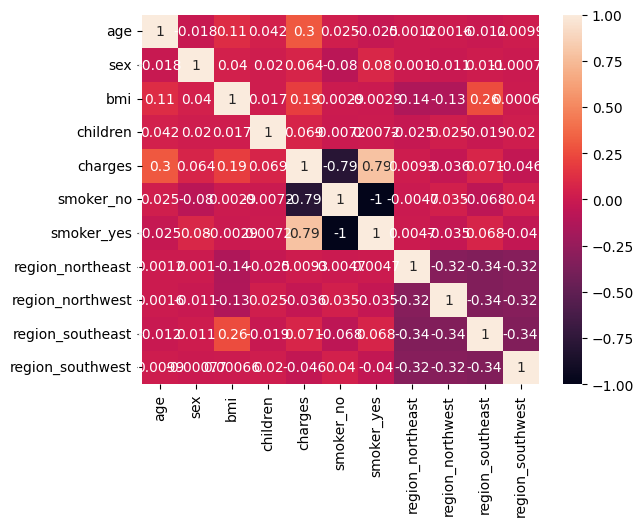

In [25]:
sns.heatmap(df_cleaned.corr(),annot=True)

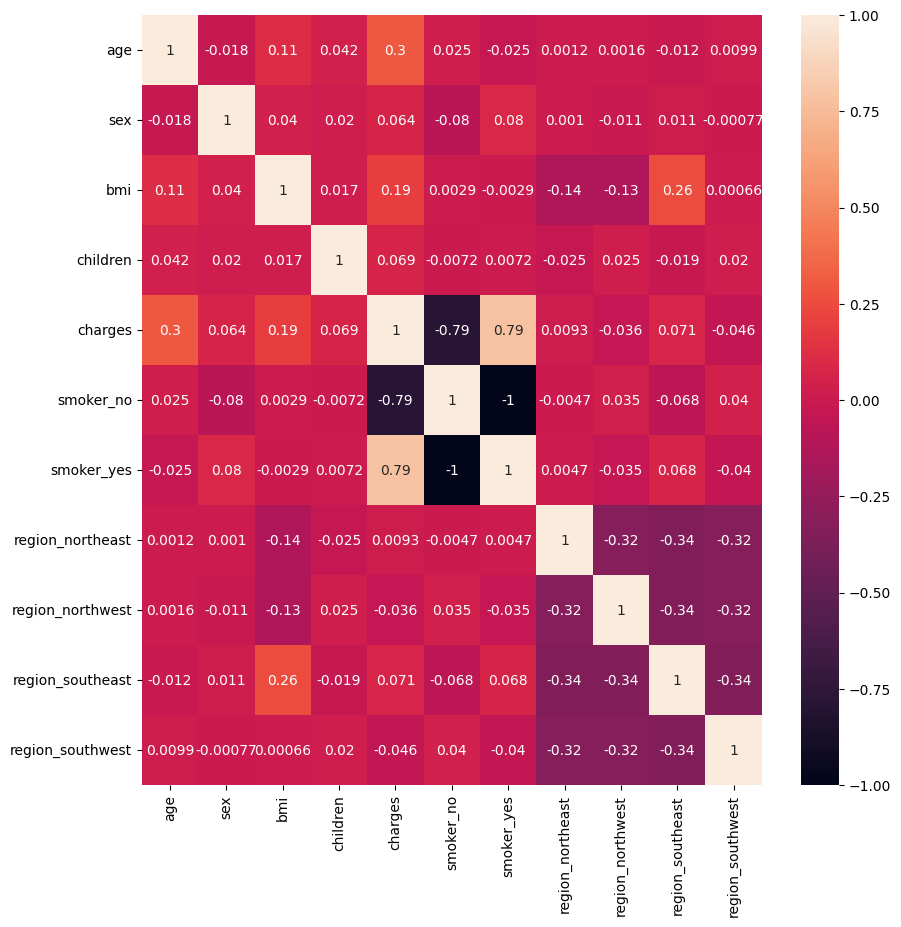

In [26]:
# increase the size of chart

plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned.corr(),annot=True)
plt.show()

In [27]:
# feature engg

df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'charges', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [28]:
x = df_cleaned[['age','bmi','smoker_yes']]
y = df_cleaned['charges']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [30]:
x_train.shape,x_test.shape

((1062, 3), (266, 3))

In [31]:
model = LinearRegression()

In [32]:
model

LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [35]:
print(f'Testing result: {r2_score(y_test,y_pred)}')
print(f'Training result: {r2_score(y_train,y_train_pred)}')

Testing result: 0.7202273125601633
Training result: 0.751283961761476


In [36]:
print(f'Testing result: {mean_squared_error(y_test,y_pred)}')
print(f'Training result: {mean_squared_error(y_train,y_train_pred)}')

Testing result: 34489645.99998615
Training result: 37029878.946217455


In [37]:
# How to save the model

import pickle

with open('best_model.pkl','wb') as f:
    pickle.dump(model,f)